In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import transforms
from mpl_toolkits.mplot3d import Axes3D

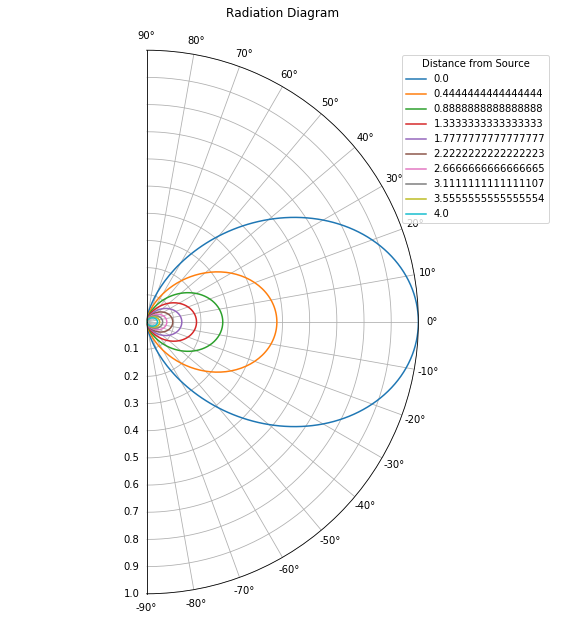

In [2]:
P = 3
d = np.linspace(0,4 , 10)
PSD = []
angle = np.linspace(-90 , 90 , 181)
theta = angle*np.pi/180


for i in d :
    PSD.append((P/(i+1)**2)*(np.cos(theta)**2))

plt.figure(figsize = (20,10))
for i in range(len(PSD)) : 
    plt.polar(theta , PSD[i]/P , label = d[i])
    
limit = 1
plt.ylim(0, limit)
plt.xlim(-np.pi/2 , np.pi/2)
plt.xticks(np.arange(-np.pi/2, np.pi/2 +10*np.pi/180 , step=(10*np.pi/180)))
plt.yticks(np.arange(0,limit+.1,step= limit/10))
plt.title("Radiation Diagram")
plt.legend(title = "Distance from Source")
plt.show()

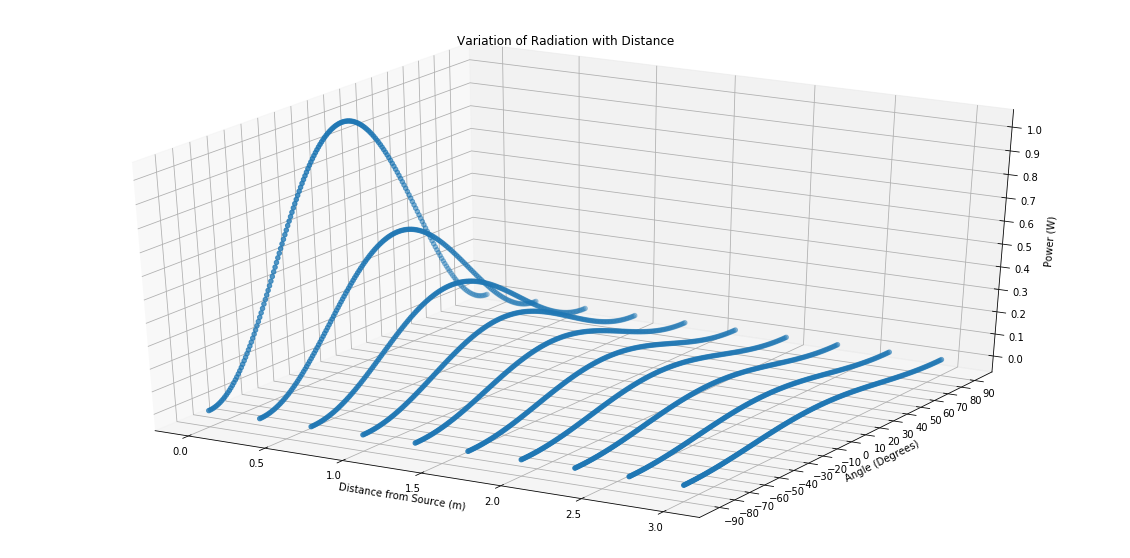

In [3]:
P = 3
x = []
y = []
z = []
PSD = []
d = np.linspace(0,3 , 10)
angle = np.linspace(-90 , 90 , 181)
theta = angle*np.pi/180

for i in d :
    PSD.append((P/(i+1)**2)*(np.cos(theta)**2))

P_Angle = []
for a in range(len(d)) :
    for b in range(len(angle)) :
        P_Angle.append([angle[b] , PSD[a][b]/P , d[a]])
        
P_Angle.sort(key = lambda x: x[0])

for a in angle :
    for i in P_Angle :
        if i[0] == a :
            x.append(i[1])
            y.append(i[2])
            z.append(a)

fig = plt.figure(figsize = (20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(y , z , x)
ax.set_zlabel("Power (W)")
ax.set_ylabel("Angle (Degrees)")
ax.set_xlabel("Distance from Source (m)")
ax.set_title("Variation of Radiation with Distance")
ax.set_zticks(np.arange(0,1.1, step = 0.1))
ax.set_yticks(np.arange(-90 , 100 ,step = 10))
plt.show()

Enter Distance from Source : 1


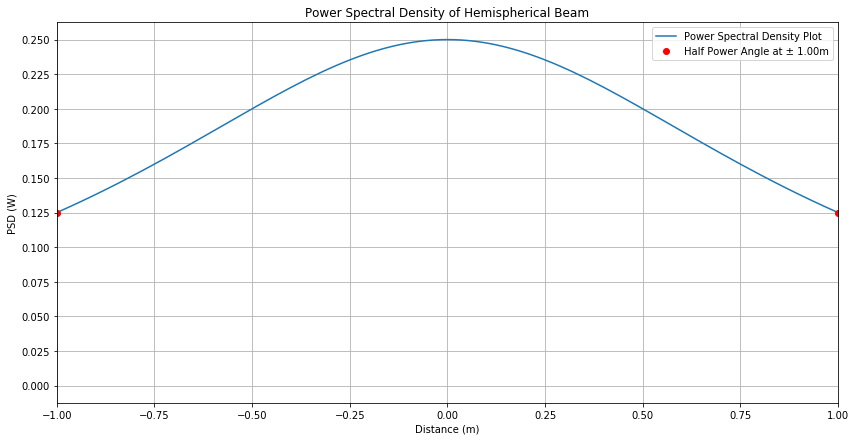

In [251]:
select_dis = float(input("Enter Distance from Source : "))
angle = np.linspace(-90 , 90 , 181)
theta = angle*np.pi/180
P = 1

dis = []
for item in theta :
    dis.append(select_dis*np.tan(item))

PSD_dis = ((P/(select_dis+1)**2)*(np.cos(theta)**2))

dis_50 = []
Power_50 = []
PSD_50 = max(PSD_dis)/2
limit = max(PSD_dis)/500
for i in range(len(PSD_dis)) :  
    if PSD_50 - limit <= PSD_dis[i] <= PSD_50 + limit :
        dis_50.append(dis[i])
        Power_50.append(PSD_dis[i])
        

fig = plt.figure(figsize = (14,7))
plt.plot(dis,PSD_dis , label = "Power Spectral Density Plot")
plt.plot(dis_50[0], Power_50[0] , 'ro' , label = 'Half Power Angle at \u00B1 %1.2fm' %dis_50[1])
plt.plot(dis_50[1], Power_50[1] , 'ro')
plt.grid()
plt.title("Power Spectral Density of Hemispherical Beam")
plt.xlabel("Distance (m)")
plt.ylabel("PSD (W)")
plt.xlim(-1,1)
#plt.xlim(5*dis_50[0] , 5*dis_50[1])
plt.yticks(np.arange(0,max(PSD_dis)+max(PSD_dis)/10 , step = max(PSD_dis)/10))
plt.legend()
plt.show()

Enter Distance from Source : .00001


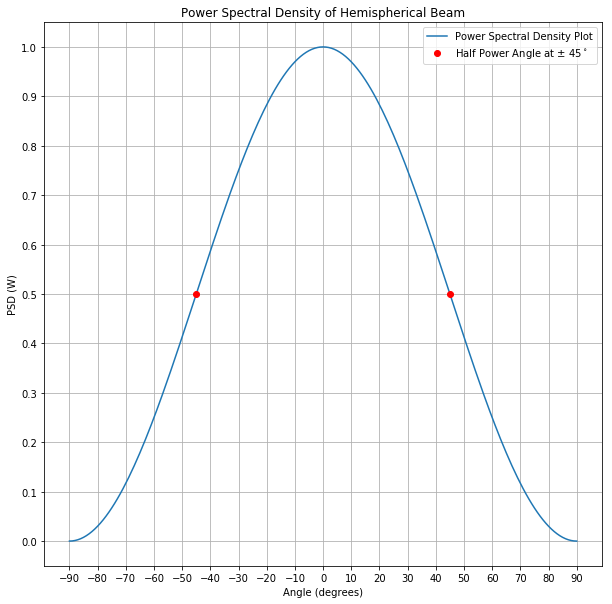

In [18]:
select_dis = float(input("Enter Distance from Source : "))
angle = np.linspace(-90 , 90 , 181)
theta = angle*np.pi/180
P = 1

PSD_dis = ((P/(select_dis+1)**2)*(np.cos(theta)**2))

angle_50 = []
Power_50 = []
PSD_50 = max(PSD_dis)/2
limit = max(PSD_dis)/100
for i in range(len(PSD_dis)) :  
    if PSD_50 - limit <= PSD_dis[i] <= PSD_50 + limit :
        angle_50.append(angle[i])
        Power_50.append(PSD_dis[i])

fig = plt.figure(figsize = (10,10))
plt.plot(angle,PSD_dis , label = "Power Spectral Density Plot")
plt.plot(angle_50[0], Power_50[0] , 'ro' , label = 'Half Power Angle at \u00B1 %i$^\circ$' %angle_50[1])
plt.plot(angle_50[1], Power_50[1] , 'ro')
plt.grid()
plt.title("Power Spectral Density of Hemispherical Beam")
plt.xlabel("Angle (degrees)")
plt.ylabel("PSD (W)")
plt.xticks(np.arange(-90 , 100 , step = 10))
plt.yticks(np.arange(0,max(PSD_dis)+max(PSD_dis)/10 , step = max(PSD_dis)/10))
plt.legend()
plt.show()

Select Desired Angle :1


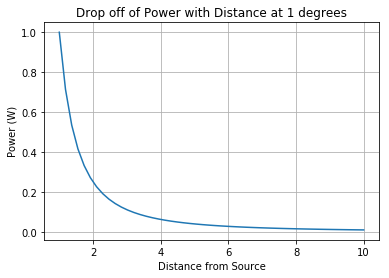

In [6]:
P = 1
x = []
y = []
PSD = []
angle_select =  int(input("Select Desired Angle :"))
d = np.linspace(1,10 , 50)
angle = np.linspace(-90 , 90 , 181)
theta = angle*np.pi/180

for i in d :
    PSD.append((P/i**2)*(np.cos(theta)**2))

P_Angle = []
for a in range(len(d)) :
    for b in range(len(angle)) :
        P_Angle.append([angle[b] , PSD[a][b] , d[a]])
        
P_Angle.sort(key = lambda x: x[0])

for a in P_Angle :
    if a[0] == angle_select :
        x.append(a[1])
        y.append(a[2])
        
        
plt.plot(y,x)
plt.title("Drop off of Power with Distance at %i degrees" %angle_select)
plt.xlabel("Distance from Source")
plt.ylabel("Power (W)")
plt.grid()
plt.show()
        

In [104]:
Bell_shape = (P/((1+select_dis)**2))*np.cos(theta)
for item1 in Bell_shape[1:-1] :
    for item2 in PSD_dis[1:-1] :
        if item2 - .0001 <= item1 <= item2 + .0001 :
            for i in range(len(Bell_shape)) :
                if item1 == Bell_shape[i] :
                    print(i)
                    print(item1)

20
0.0855050358314172
160
0.0855050358314172
20
0.0855050358314172
160
0.0855050358314172
89
0.24996192378909782
91
0.24996192378909782
89
0.24996192378909782
91
0.24996192378909782
90
0.25
90
0.25
89
0.24996192378909782
91
0.24996192378909782
89
0.24996192378909782
91
0.24996192378909782
20
0.0855050358314172
160
0.0855050358314172
20
0.0855050358314172
160
0.0855050358314172


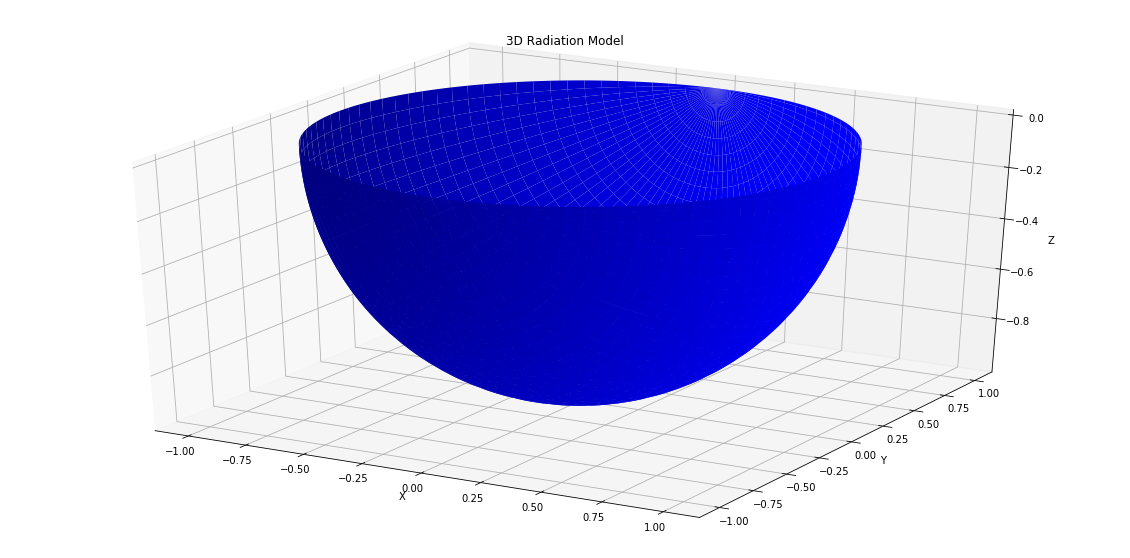

In [7]:
fig = plt.figure(figsize = (20,10))
ax = fig.add_subplot(111, projection='3d')
theta = np.linspace(-np.pi , 0 , 100)
phi = np.linspace(0, np.pi , 100)
radius = 1
x = radius*np.outer(np.cos(theta),np.sin(phi))
y = radius*np.outer(np.sin(theta),np.sin(phi))
z = radius*np.outer(np.ones(np.size(theta)), np.cos(phi))

ax.plot_surface(x , z, y, color='b')
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title("3D Radiation Model")
plt.show()